In [2]:
# Base Libraries
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
from numpy import set_printoptions
from numpy import mean
# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [3]:
creditcard = pd.read_csv("C:\\Users\\ASUS\\Desktop\\creditcard.csv\\creditcard.csv", sep=',')

creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
#splitting data
array = creditcard.values
X = array[:,0:30]
Y = array[:,30]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [5]:
# feature extraction
fi = ExtraTreesClassifier(n_estimators=10)
fi.fit(X, Y)
print(fi.feature_importances_)

[0.01246695 0.01033581 0.02213133 0.02246518 0.03661422 0.0114048
 0.01718449 0.01980059 0.01951481 0.04779923 0.05967793 0.06415617
 0.10080765 0.01034912 0.12047108 0.01055921 0.07118303 0.1535905
 0.03791682 0.01326102 0.01259364 0.01655603 0.01466813 0.01060054
 0.01021331 0.01246532 0.01463378 0.01271803 0.02095015 0.01291112]


In [6]:
array = creditcard.values
X = array[:, [17,14,10,12,11]]
Y = array[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

"""# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.2, random_state=42)"""

# Create the Gradient Boosting Classifier
gbm_model= GradientBoostingClassifier()

# Fit the model on the train data
gbm_model.fit(X_train, y_train)

# Predict the target variable on test data
gb_pred = gbm_model.predict(X_test)

# Evaluate the model performance
a=accuracy_score(y_test, gb_pred)

print(confusion_matrix(y_test, gb_pred))
print(accuracy_score(y_test, gb_pred))

[[85281    14]
 [   95    53]]
0.9987242957293166


In [8]:
import xgboost as xgb
# Create the XGBoost Classifier
xgb_model = xgb.XGBClassifier()
# Fit the model on the train data
xgb_model.fit(X_train, y_train)
# Predict the target variable on test data
xgb_pred = xgb_model.predict(X_test)
# Evaluate the model performance
print(confusion_matrix(y_test, xgb_pred))
b=accuracy_score(y_test, xgb_pred)
print(accuracy_score(y_test, xgb_pred))

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:50:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[85285    10]
 [   35   113]]
0.9994733330992591


In [9]:
from sklearn.ensemble import AdaBoostClassifier
# Create the AdaBoost Classifier
ada_model = AdaBoostClassifier()
# Fit the model on the train data
ada_model.fit(X_train, y_train)
# Predict the target variable on test data
ada_pred = ada_model.predict(X_test)
# Evaluate the model performance
print(confusion_matrix(y_test, ada_pred))
print(accuracy_score(y_test, ada_pred))
c=accuracy_score(y_test, ada_pred)

[[85272    23]
 [   54    94]]
0.9990988144142879


In [10]:
from sklearn.linear_model import LinearRegression
# Predict the target variable on test data using base classifiers
xgb_pred = xgb_model.predict(X_test)
gb_pred = gbm_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

# Combine the predictions using linear regression
lr_model = LinearRegression()
lr_train_data = pd.DataFrame({'XGB': xgb_pred, 'GB': gb_pred, 'ADA': ada_pred})
lr_model.fit(lr_train_data, y_test)
# Predict the target variable on test data using meta-classifier
meta_pred = lr_model.predict(lr_train_data)
# Evaluate the model performance
meta_pred_binary = [1 if x > 0.5 else 0 for x in meta_pred]
print(confusion_matrix(y_test, meta_pred.round()))
print(accuracy_score(y_test, meta_pred_binary))
d=accuracy_score(y_test, meta_pred_binary)

[[85285    10]
 [   35   113]]
0.9994733330992591


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier model with default parameters
rf_clf = RandomForestClassifier()

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_clf.predict(X_test)

# Evaluate the performance of the model
e = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(e * 100))

Accuracy: 93.00%


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN Classifier model with k=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_clf.predict(X_test)

# Evaluate the performance of the model
f= accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(f * 100))


Accuracy: 93.33%


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression Classifier model with default parameters
lr_clf = LogisticRegression()

# Train the model on the training data
lr_clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr_clf.predict(X_test)

# Evaluate the performance of the model
g= accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(g * 100))


Accuracy: 77.00%


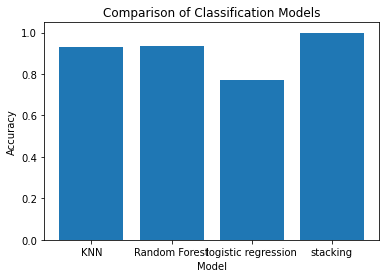

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


# Create a bar chart to compare the accuracies of the models
models = ['KNN', 'Random Forest', 'logistic regression', 'stacking']
accuracies = [e, f, g, d]
plt.bar(models, accuracies)
plt.title('Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()